In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
concrete = pd.read_csv('concrete_na.csv')
concrete.fillna(concrete.mean(0), inplace=True)
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [3]:
# label 추가
concrete['label'] = pd.qcut(concrete.strength, [0, 0.5, 1.0], labels=['fail', 'pass']) 
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,fail
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,fail
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,fail
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,pass
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,fail


In [6]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(concrete.iloc[:,:-1]) # label제외
print(f'type(scaled)  : {type(scaled)}, scaled.shape : {scaled.shape })')

type(scaled)  : <class 'numpy.ndarray'>, scaled.shape : (1030, 9))


In [7]:
X = scaled[:, :-1]
X.shape

(1030, 8)

In [8]:
y = np.array(concrete.label)
y.shape

(1030,)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

In [12]:
print(f'predict : {clf.predict(x_test)}')

predict : ['fail' 'pass' 'fail' 'fail' 'fail' 'fail' 'fail' 'pass' 'pass' 'fail'
 'fail' 'fail' 'fail' 'fail' 'fail' 'pass' 'fail' 'fail' 'fail' 'fail'
 'pass' 'fail' 'fail' 'pass' 'pass' 'pass' 'pass' 'pass' 'pass' 'fail'
 'fail' 'fail' 'fail' 'pass' 'fail' 'pass' 'pass' 'fail' 'pass' 'fail'
 'pass' 'pass' 'fail' 'fail' 'pass' 'fail' 'fail' 'fail' 'fail' 'fail'
 'pass' 'fail' 'fail' 'fail' 'fail' 'fail' 'pass' 'fail' 'fail' 'fail'
 'fail' 'pass' 'fail' 'fail' 'pass' 'fail' 'fail' 'pass' 'fail' 'fail'
 'pass' 'pass' 'pass' 'fail' 'fail' 'pass' 'fail' 'fail' 'pass' 'fail'
 'fail' 'pass' 'pass' 'pass' 'pass' 'pass' 'pass' 'fail' 'pass' 'pass'
 'pass' 'pass' 'fail' 'pass' 'pass' 'pass' 'pass' 'pass' 'pass' 'fail'
 'fail' 'fail' 'pass' 'pass' 'pass' 'pass' 'fail' 'fail' 'pass' 'pass'
 'fail' 'fail' 'pass' 'fail' 'pass' 'pass' 'fail' 'pass' 'fail' 'fail'
 'pass' 'fail' 'pass' 'fail' 'fail' 'fail' 'pass' 'fail' 'fail' 'pass'
 'pass' 'fail' 'pass' 'fail' 'pass' 'pass' 'pass' 'fail' 'pass' 'pa

In [13]:
print(f'accuracy : {clf.score(x_test, y_test):.2f}')

accuracy : 0.81


c:\users\edu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\edu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\edu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\edu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\edu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, fla

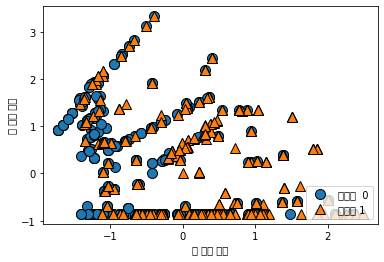

X.shape : (1030, 8)


In [16]:
# coding: utf-8
import matplotlib.pyplot as plt
import mglearn

# 산점도를 그린다.
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스  0","클래스 1"],loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번쨰 특성")
plt.show()
print("X.shape : {}".format(X.shape))
# X.shape : (26, 2)
# 포인트 26개와 2개의 특성을 가지고 있다

c:\users\edu\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


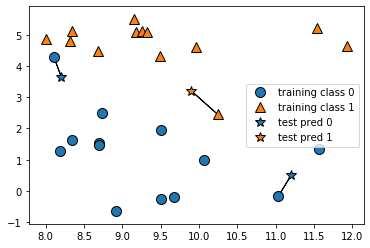

c:\users\edu\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


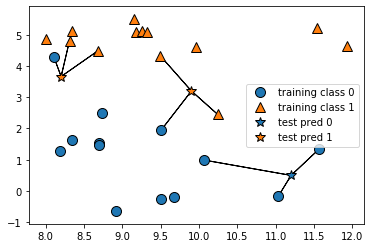

In [17]:
# KNN : k-Nearest Neighbors 알고리즘
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

# KNN : k-Nearest Neighbors 알고리즘
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

ValueError: query data dimension must match training data dimension

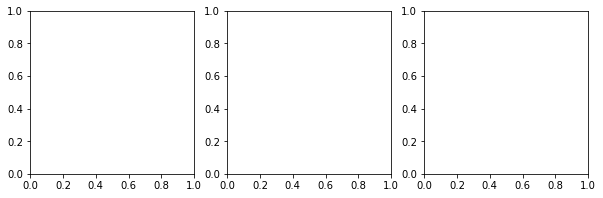

In [18]:
# subplot 1줄에 3개짜리 생성
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 이웃의 갯수에 따른 최근접 이웃 모델의 경계
# 아래는 [1,3,9] 이므로 1개/3개/9개의 이웃일때 의 경계를 표시한다.
for n_neighbors, ax in zip([1,3,9],axes):
    # fit 메서드는 self 객체를 반환한다.
    # 객체 생성과 fit 메서드를 한줄에 쓸 수 있따.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)